In [1]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

In [2]:
import abc

class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

In [ ]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        pred = X.dot(w)
        loss = np.mean(((pred - y) ** 2))
        return loss

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        return (2 * np.dot(X.T, X.dot(w) - y)) / X.shape[0]

In [4]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray, 
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    trajectory = []
    w = w_init.copy()
    for _ in range(n_iterations):
        grad = loss.calc_grad(X, y, w)
        w = w - lr * grad
        trajectory.append(w.copy())
    return trajectory

In [5]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

In [6]:
np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)

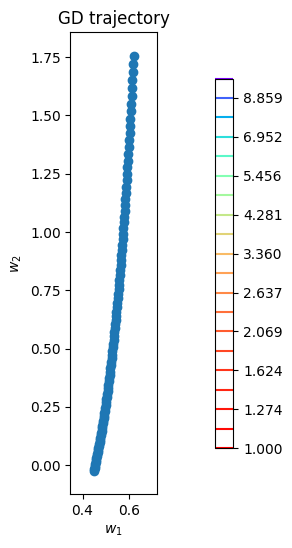

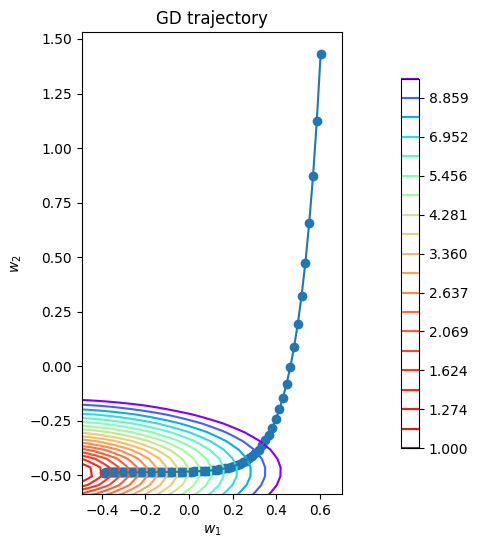

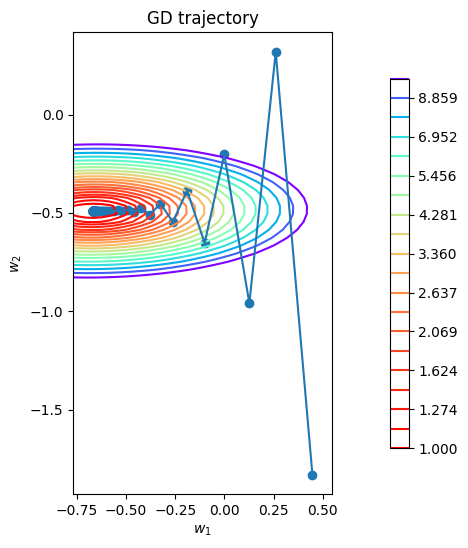

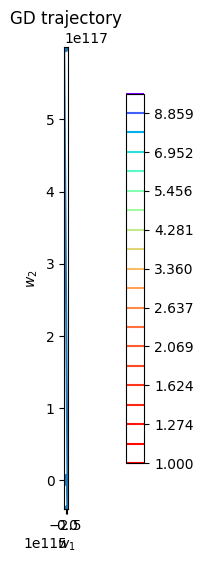

In [7]:
i = 0.0001
while i <= 0.1:
    l = i
    w_list = gradient_descent(w_init, X, y, loss, l, 100)
    plot_gd(w_list, X, y, loss)
    i *= 10

In [8]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    trajectory = []
    w = w_init.copy()
    for _ in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch_X = X[batch_indices]
        batch_y = y[batch_indices]
        grad = loss.calc_grad(batch_X, batch_y, w)
        w = w - lr * grad
        trajectory.append(w.copy())
    return trajectory

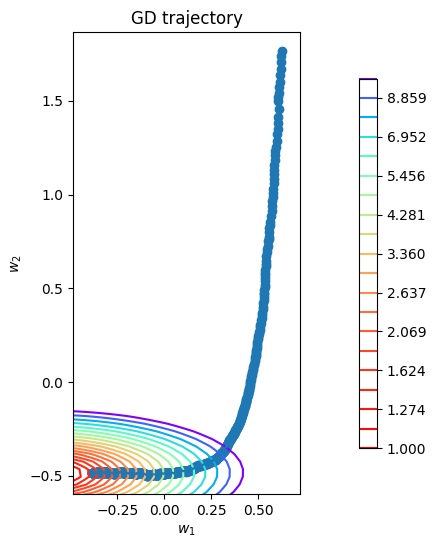

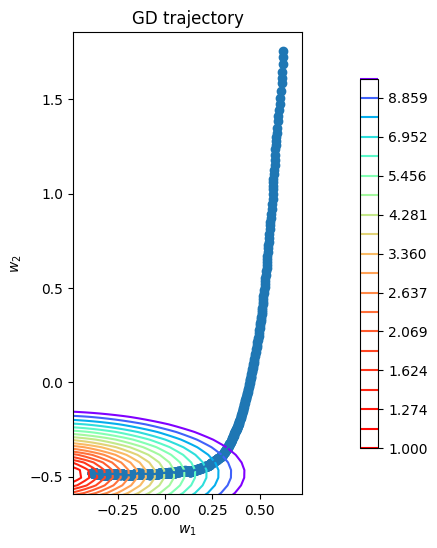

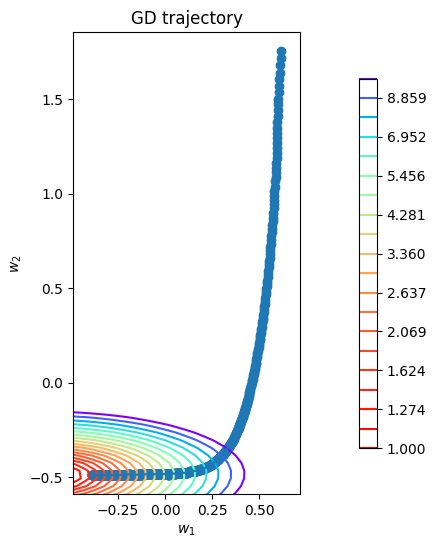

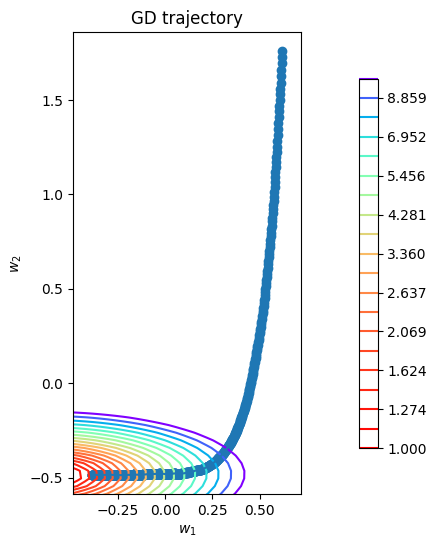

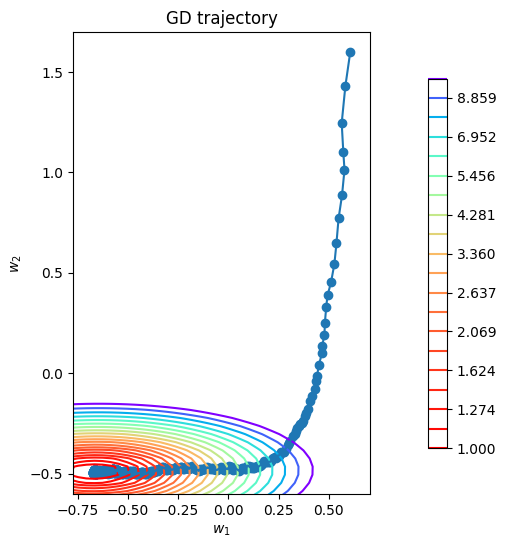

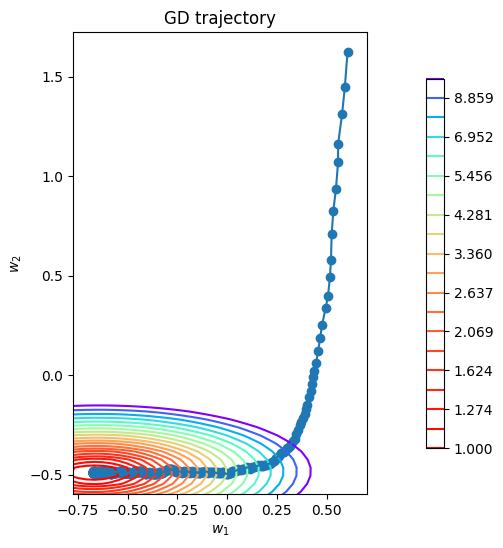

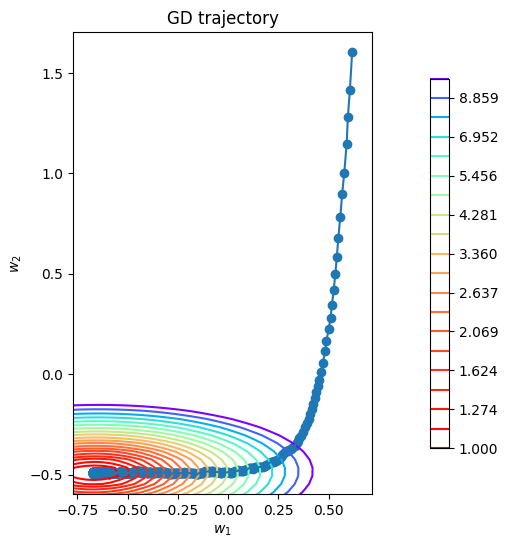

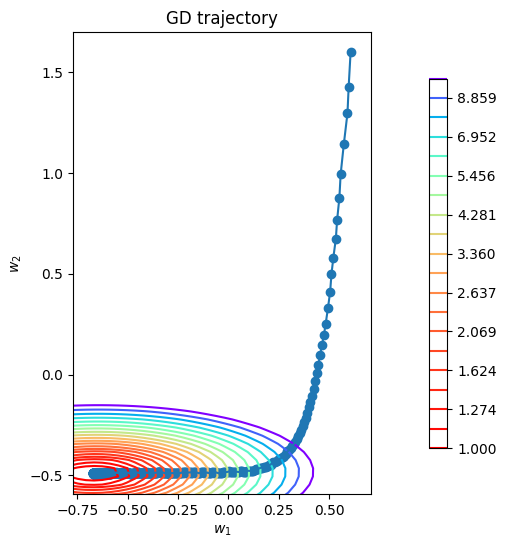

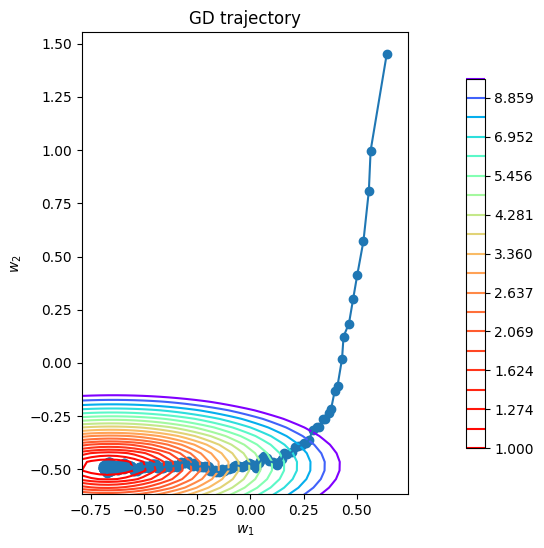

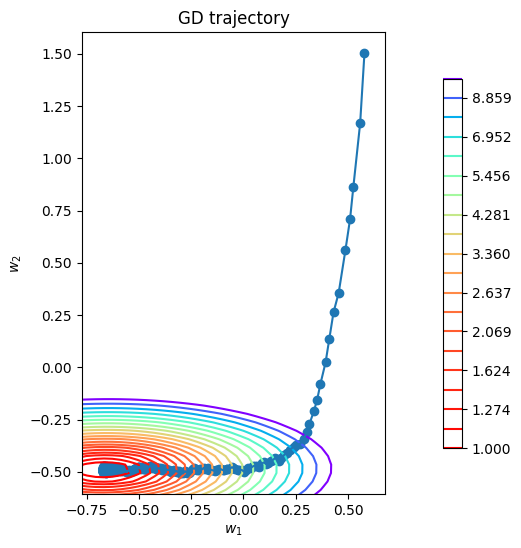

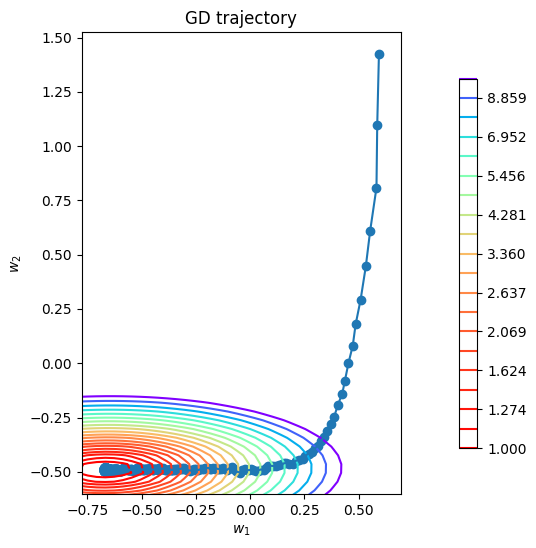

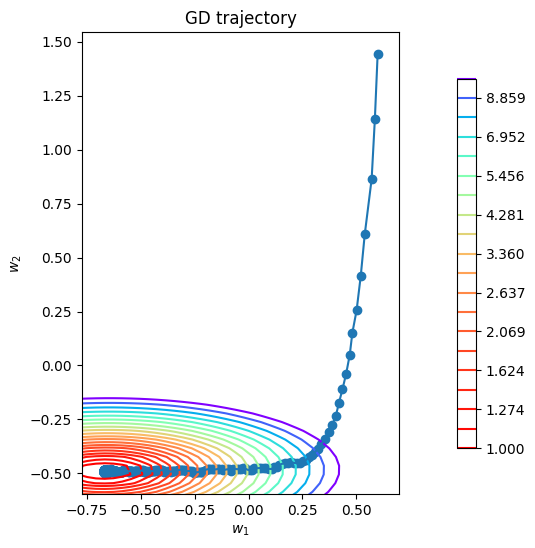

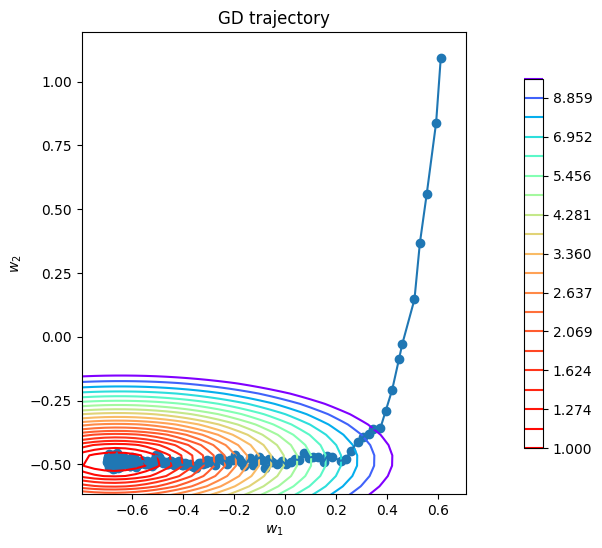

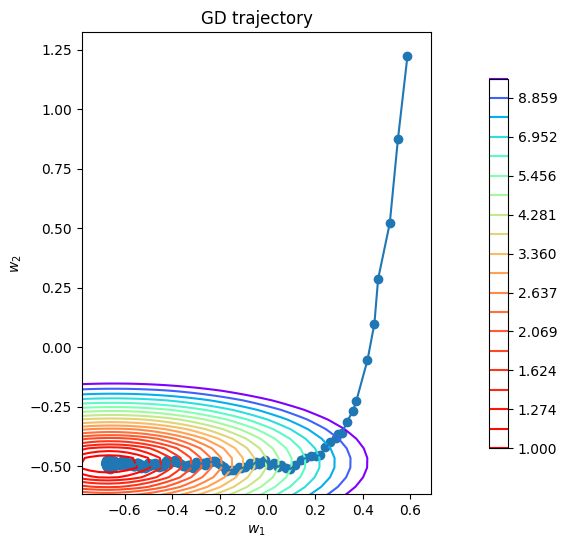

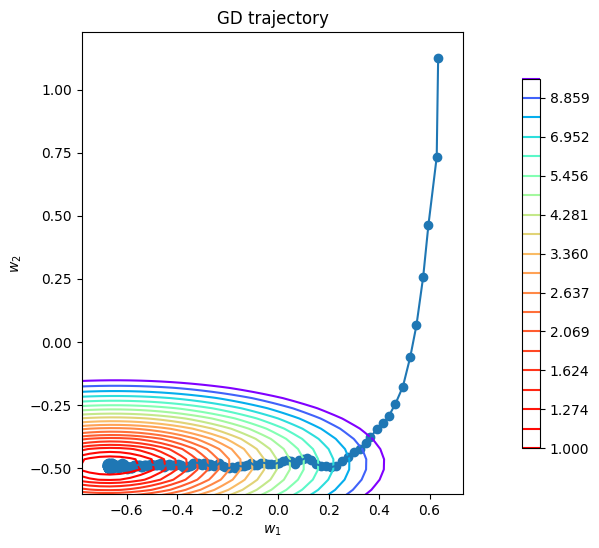

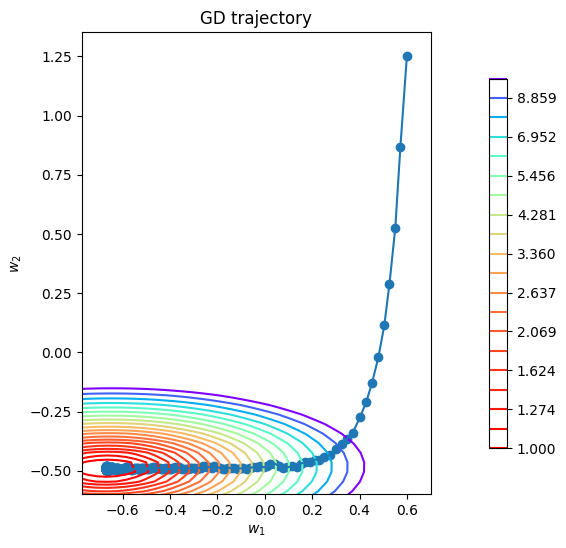

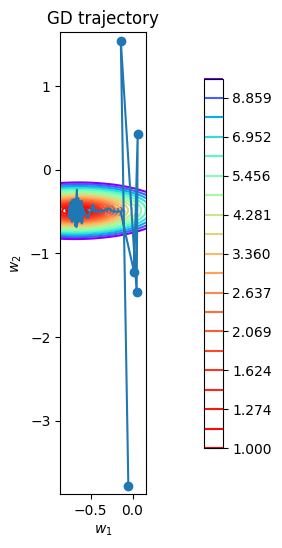

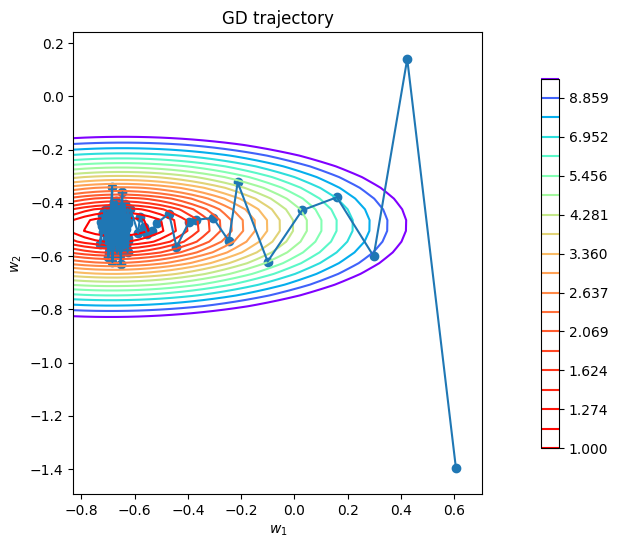

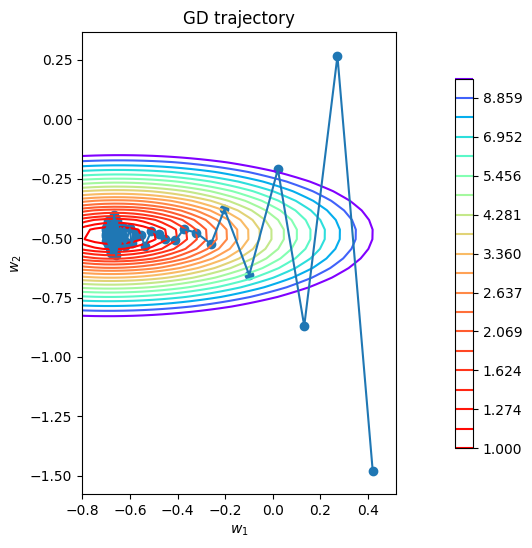

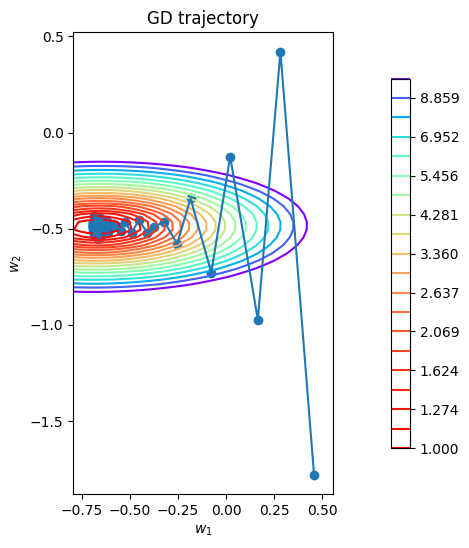

In [9]:
lrs = [0.0001, 0.0005, 0.001, 0.0015, 0.01]
batch_sizes = [16, 32, 64, 100]

for l in lrs:
    for b in batch_sizes:
        w_list = stochastic_gradient_descent(w_init, X, y, loss, l, b)
        plot_gd(w_list, X, y, loss)

In [10]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    new_ws = []
    w_prev = w_init
    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        y_new = y[batch_indices]
        n = lr * (1 / (1 + i)) ** p
        curr_w = w_prev - n * loss.calc_grad(batch, y_new, w_prev)
        new_ws.append(curr_w)
        w_prev = curr_w
    return new_ws

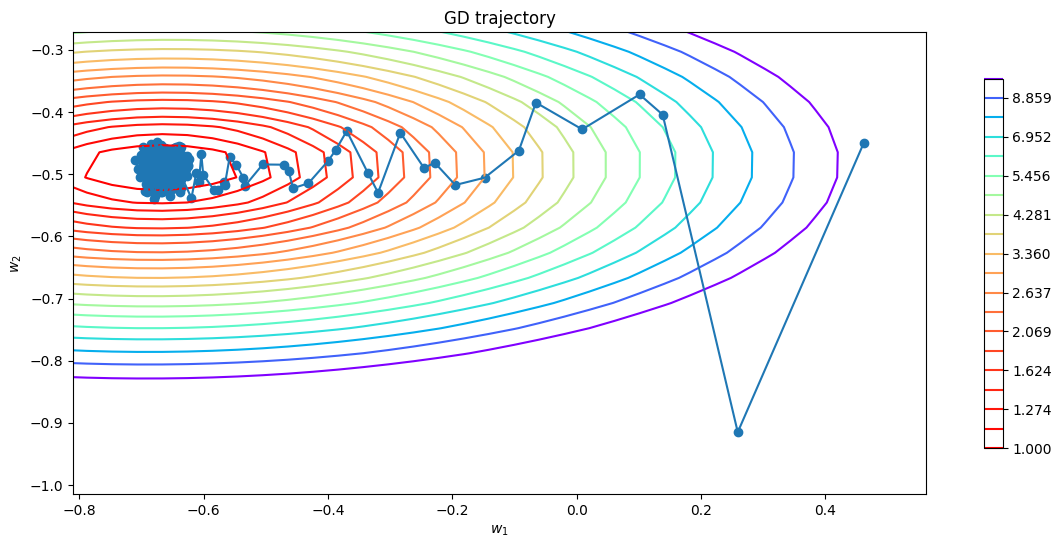

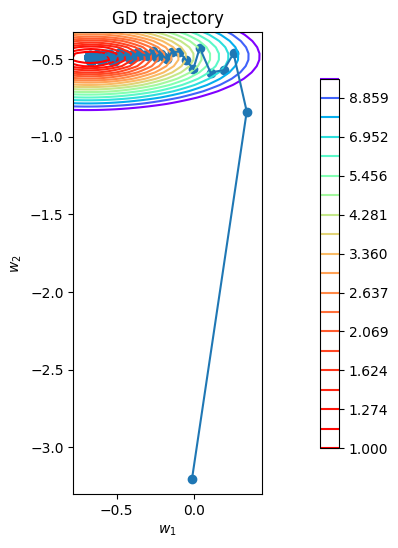

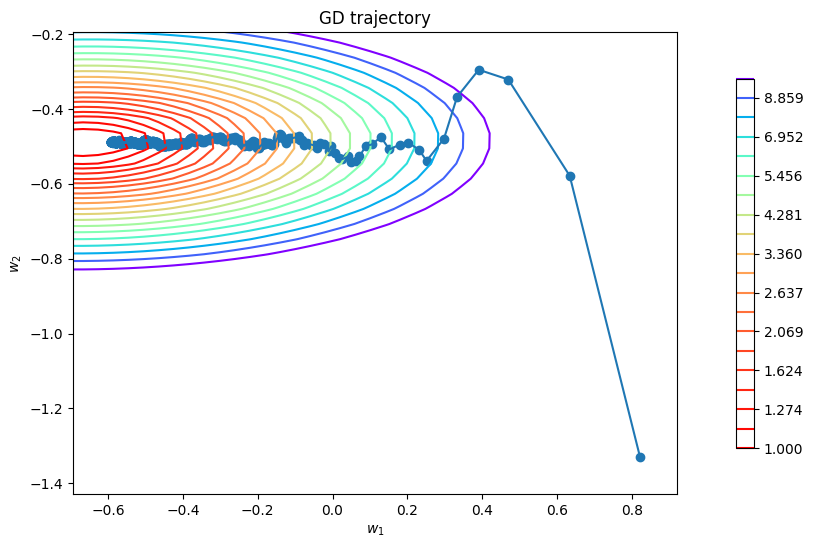

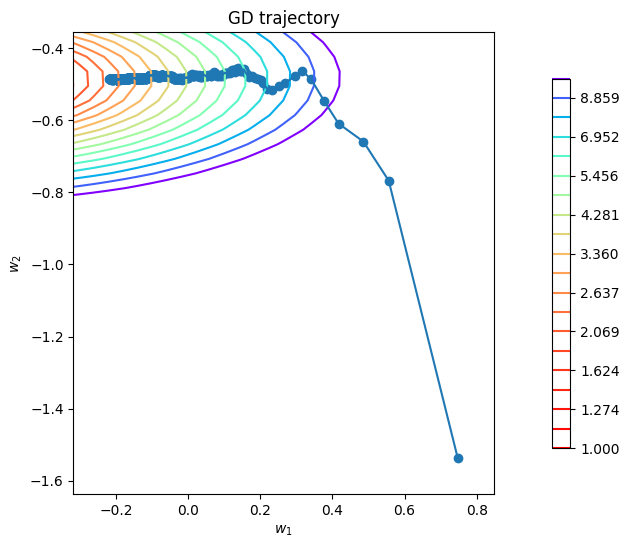

In [11]:
lr = 0.01
ps = [0.25, 0.5, 0.75, 1]
for p in ps:
    loss = MSELoss()
    w_list = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, p)
    plot_gd(w_list, X, y, loss)

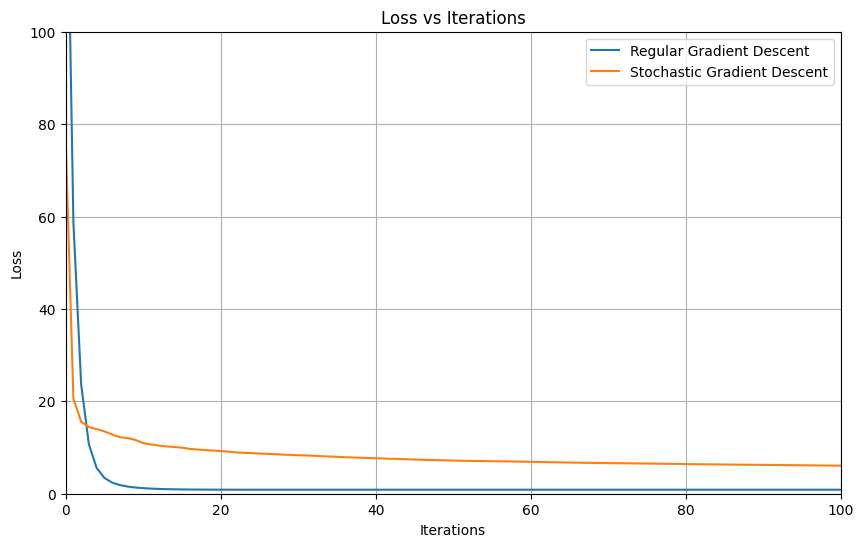

In [12]:
batch_size = 10

w_regular_list = gradient_descent(w_init, X, y, loss, lr)
loss_regular = []
for w in w_regular_list:
    loss_regular.append(loss.calc_loss(X, y, w))

w_stochastic_list = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, p)
loss_stochastic = []
for w in w_stochastic_list:
    loss_stochastic.append(loss.calc_loss(X, y, w))

plt.figure(figsize=(10, 6))
plt.plot(loss_regular, label='Regular Gradient Descent')
plt.plot(loss_stochastic, label='Stochastic Gradient Descent')
plt.title('Loss vs Iterations')
plt.ylim(0, 100)
plt.xlim(0, 100)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        w_init = np.random.uniform(-2, 2, (X.shape[1]))
        trajectory = gradient_descent(
            w_init=w_init,
            X=X,
            y=y,
            loss=self.loss,
            lr=self.lr
        )

        self.w = trajectory[-1]

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        return X.dot(self.w)

In [14]:
linear_regression = LinearRegression(MSELoss())

In [15]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [16]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

In [17]:
X_raw = X_raw.drop('index', axis=1)
X_raw.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22


In [18]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [19]:
numeric_imputer = SimpleImputer(strategy='mean')
numeric_features = X_raw.select_dtypes(include=['float64', 'int64']).columns
X_raw[numeric_features] = numeric_imputer.fit_transform(X_raw[numeric_features])

scaler = StandardScaler()
X_raw[numeric_features] = scaler.fit_transform(X_raw[numeric_features])

categorical_features = X_raw.select_dtypes(include=['object']).columns
encoded_X_raw = pd.get_dummies(X_raw[categorical_features], drop_first=True)
X_raw = X_raw.drop(columns=categorical_features)
X_raw = pd.concat([X_raw, encoded_X_raw], axis=1)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, random_state=42)

print(X_train.shape)
print(X_test.shape)

(150, 64)
(51, 64)


In [21]:
model = LinearRegression(MSELoss())
model.fit(X_train, y_train);

In [22]:
from sklearn.metrics import mean_squared_error

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Ошибка на обучающей выборке:", train_mse)
print("Ошибка на тестовой выборке:", test_mse)

Ошибка на обучающей выборке: 1352597.2671997782
Ошибка на тестовой выборке: 10382907.398777092


In [23]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        w_without_bias = w[:-1]
        mse_loss = np.mean((X.dot(w) - y) ** 2)
        regularization_term = self.coef * np.linalg.norm(w_without_bias) ** 2
        return mse_loss + regularization_term

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        w_without_bias = w[:-1]
        mse_grad = 2 * X.T.dot(X.dot(w) - y) / X.shape[0]
        regularization_grad = 2 * self.coef * w_without_bias
        return mse_grad + np.hstack([regularization_grad, [0]]) 

In [24]:
linear_regression = LinearRegression(MSEL2Loss(0.1))
linear_regression.fit(X_train, y_train)
y_train_pred2 = linear_regression.predict(X_train)
y_test_pred2 = linear_regression.predict(X_test)
train_mse2 = mean_squared_error(y_train, y_train_pred2)
test_mse2 = mean_squared_error(y_test, y_test_pred2)

print("Ошибка на обучающей выборке:", train_mse2)
print("Ошибка на тестовой выборке:", test_mse2)

Ошибка на обучающей выборке: 4779757.664185333
Ошибка на тестовой выборке: 17567584.6371969


In [25]:
coef_values = [0.001, 0.01, 0.1, 1.0, 10.0]

best_mse = float('inf')
best_coef = None

for coef in coef_values:
    loss = MSEL2Loss(coef=coef)
    linear_regression = LinearRegression(loss=loss, lr=0.01)

    linear_regression.fit(X_train, y_train)
    
    y_test_pred = linear_regression.predict(X_test)
    
    mse = mean_squared_error(y_test, y_test_pred)
    
    if mse < best_mse:
        best_mse = mse
        best_coef = coef

loss_without_reg = MSEL2Loss(coef=0.0)
linear_regression_without_reg = LinearRegression(loss=loss_without_reg, lr=0.1)
linear_regression_without_reg.fit(X_train, y_train)
y_test_pred_without_reg = linear_regression_without_reg.predict(X_test)
mse_without_reg = mean_squared_error(y_test, y_test_pred_without_reg)

print("Лучшее значение коэффициента регуляризации:", best_coef)
print("MSE на тестовой выборке с лучшим значением коэффициента регуляризации:", best_mse)
print("MSE на тестовой выборке без регуляризации:", mse_without_reg)


Лучшее значение коэффициента регуляризации: 0.001
MSE на тестовой выборке с лучшим значением коэффициента регуляризации: 6362273.9015981695
MSE на тестовой выборке без регуляризации: 10382530.43585044


In [26]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        z = X.dot(w) - y
        loss = np.mean(np.where(np.abs(z) <= self.eps, 0.5 * z**2, self.eps * (np.abs(z) - 0.5 * self.eps)))
        return loss
        

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        z = X.dot(w) - y
        grad = X.T.dot(np.where(np.abs(z) <= self.eps, z, self.eps * np.sign(z))) / X.shape[0]
        return grad

In [27]:
huber_loss = HuberLoss(eps=1.0)
linear_regression_huber = LinearRegression(loss=huber_loss, lr=0.1)

linear_regression_huber.fit(X_train, y_train)

y_train_pred_huber = linear_regression_huber.predict(X_train)
y_test_pred_huber = linear_regression_huber.predict(X_test)

train_mse_huber = mean_squared_error(y_train, y_train_pred_huber)
test_mse_huber = mean_squared_error(y_test, y_test_pred_huber)

mse_loss = MSELoss()
linear_regression_mse = LinearRegression(loss=mse_loss, lr=0.1)

linear_regression_mse.fit(X_train, y_train)

y_train_pred_mse = linear_regression_mse.predict(X_train)
y_test_pred_mse = linear_regression_mse.predict(X_test)

train_mse_mse = mean_squared_error(y_train, y_train_pred_mse)
test_mse_mse = mean_squared_error(y_test, y_test_pred_mse)

print("MSE на обучающей выборке с Huber Loss:", train_mse_huber)
print("MSE на тестовой выборке с Huber Loss:", test_mse_huber)
print("MSE на обучающей выборке с использованием MSELoss:", train_mse_mse)
print("MSE на тестовой выборке с использованием MSELoss:", test_mse_mse)


MSE на обучающей выборке с Huber Loss: 12503318.583363056
MSE на тестовой выборке с Huber Loss: 44876035.23176715
MSE на обучающей выборке с использованием MSELoss: 1352597.3921839471
MSE на тестовой выборке с использованием MSELoss: 10382773.111259738
